In [1]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [11]:
_5151_training_acc, _5151_training_loss, _5151_val_acc, _5151_val_loss = read_file('5151/')
_5155_training_acc, _5155_training_loss, _5155_val_acc, _5155_val_loss = read_file('5155/')
_5551_training_acc, _5551_training_loss, _5551_val_acc, _5551_val_loss = read_file('5551/')
_5555_training_acc, _5555_training_loss, _5555_val_acc, _5555_val_loss = read_file('5555/')

_20151_training_acc, _20151_training_loss, _20151_val_acc, _20151_val_loss = read_file('20151/')
_20155_training_acc, _20155_training_loss, _20155_val_acc, _20155_val_loss = read_file('20155/')
_20551_training_acc, _20551_training_loss, _20551_val_acc, _20551_val_loss = read_file('20551/')
_20555_training_acc, _20555_training_loss, _20555_val_acc, _20555_val_loss = read_file('20555/')

_60151_training_acc, _60151_training_loss, _60151_val_acc, _60151_val_loss = read_file('60151/')
new_60151_training_acc, new_60151_training_loss, new_60151_val_acc, new_60151_val_loss = read_file('60151_new//')
_new_60151_training_acc, _new_60151_training_loss, _new_60151_val_acc, _new_60151_val_loss = read_file('60151_new_prove//')
_60155_training_acc, _60155_training_loss, _60155_val_acc, _60155_val_loss = read_file('60155/')
_60551_training_acc, _60551_training_loss, _60551_val_acc, _60551_val_loss = read_file('60551/')
_60555_training_acc, _60555_training_loss, _60555_val_acc, _60555_val_loss = read_file('60555/')

In [35]:
def draw_figure(training_acc,training_loss,val_acc,val_loss,le_name=('5w_1s','20w_1s','60w_1s'),save_op=False,alpha=1):

    color_selection = ['b','r','k','m','c','g']
    len_train = int(len(training_acc[0])*alpha)
    len_test = int(len(val_acc[0])*alpha)

    training = np.arange(0, len_train, 1)
    val = np.arange(0, len_train, int(len_train/len_test))

    fig = plt.figure(figsize=(25,16))
    fig.suptitle('Training and Validation results on Omniglot dataset', fontsize=24)

    plt.subplot(2, 2, 1)
    for i in range(len(le_name)):
        plt.plot(training, training_loss[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 2)
    for i in range(len(le_name)):
        plt.plot(val, val_loss[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_loss', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 3)
    for i in range(len(le_name)):
        plt.plot(training, training_acc[i][0:len_train],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('train_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)

    plt.subplot(2, 2, 4)
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)
    for i in range(len(le_name)):
        plt.plot(val, val_acc[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)
    #,prop={'size': 24}
    if save_op:
        fig.savefig('image.jpg')
    plt.show()

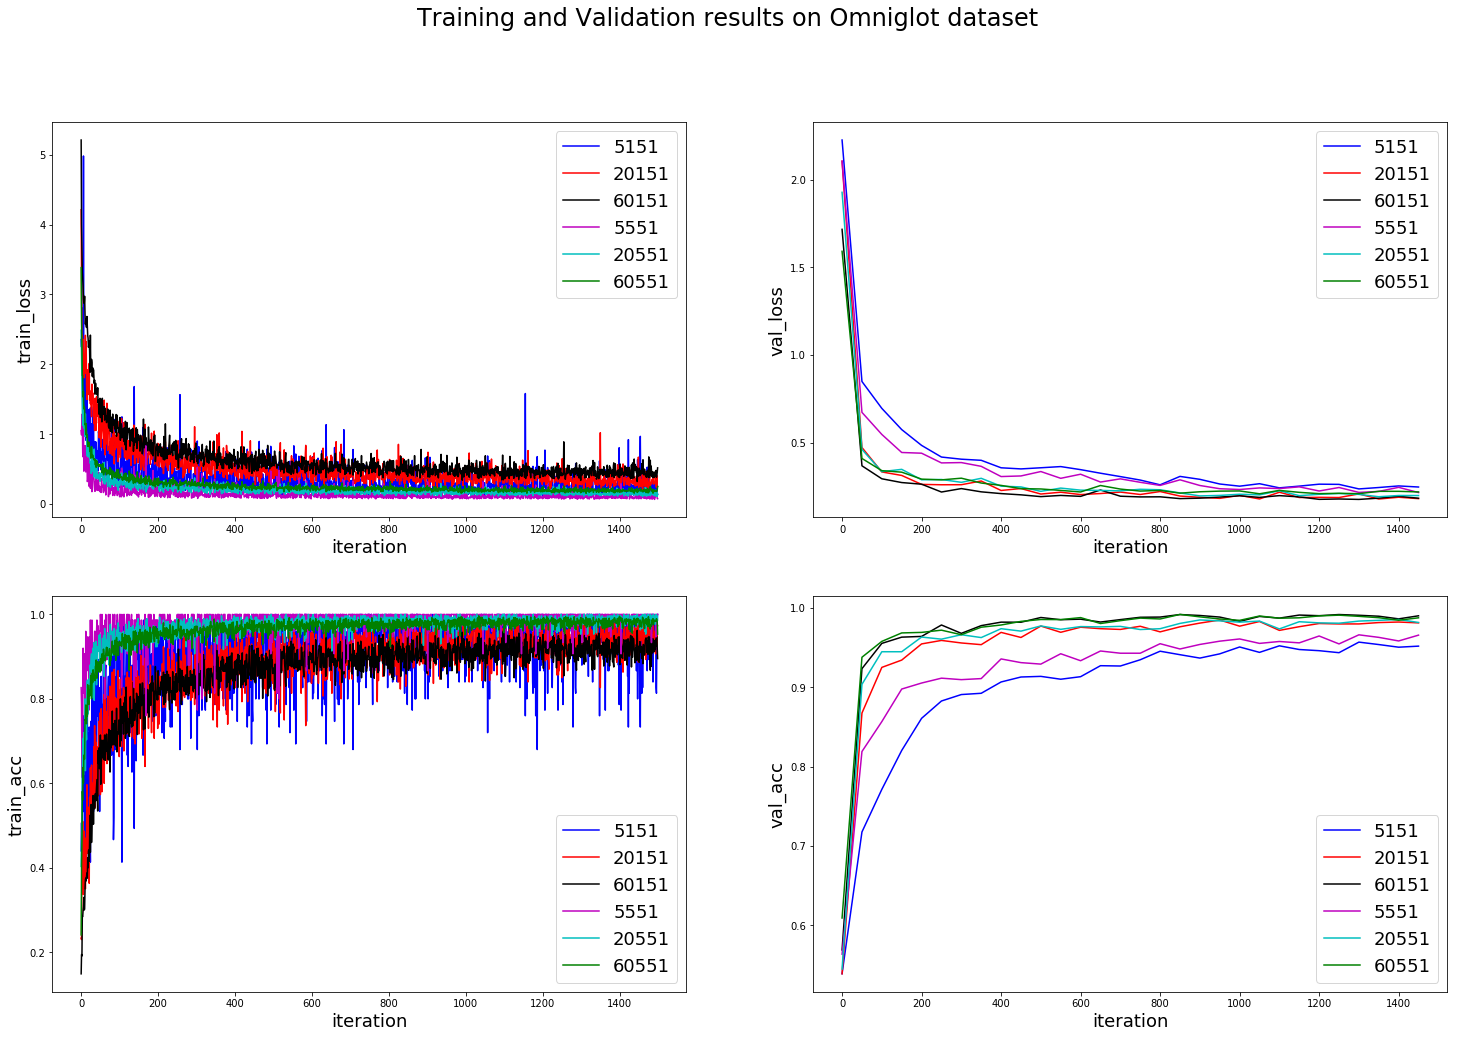

In [45]:
training_loss = [_5151_training_loss,_20151_training_loss,_60151_training_loss,_5551_training_loss,_20551_training_loss,_60551_training_loss]
training_acc = [_5151_training_acc,_20151_training_acc,_60151_training_acc,_5551_training_acc,_20551_training_acc,_60551_training_acc]
val_loss = [_5151_val_loss,_20151_val_loss,_60151_val_loss,_5551_val_loss,_20551_val_loss,_60551_val_loss]
val_acc = [_5151_val_acc,_20151_val_acc,_60151_val_acc,_5551_val_acc,_20551_val_acc,_60551_val_acc]
le_name = ('5151','20151','60151','5551','20551','60551')
draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,save_op=False,alpha=0.3)

In [12]:
val_acc = [_5151_val_acc,_20151_val_acc,_60151_val_acc,_5551_val_acc,_20551_val_acc,_60551_val_acc,new_60151_val_acc,_new_60151_val_acc]
le_name = ('5151','20151','60151','5551','20551','60551','new','prove')
for i in range(len(val_acc)):
    print(str(le_name[i]),': ', max(val_acc[i]))

5151 :  0.981066671013832
20151 :  0.9926666706800461
60151 :  0.9954666703939438
5551 :  0.9872000032663345
20551 :  0.9934666705131531
60551 :  0.9934666699171066
new :  0.9941333371400833
prove :  0.994400002360344


In [38]:
#i is length of list being calculated
for i in range(2,50,2):
    mean,diff,index,interval = return_highest(_5555_val_acc,i)
    print('from {} to {}'.format(index,index+interval),mean,diff)

from 96 to 98 0.9962000030279159 0.009317867013669545
from 88 to 92 0.9957000033557415 0.001442864667127508
from 78 to 84 0.9953555590907732 0.0011208540411444812
from 85 to 93 0.9953666698932648 0.0007168545964504336
from 88 to 98 0.9952933362722396 0.000741616871998918
from 68 to 80 0.9951888919373353 0.0008405553924574205
from 78 to 92 0.9951238129820144 0.0007702665195166158
from 68 to 84 0.9951583364978434 0.0006165086936196218
from 74 to 92 0.995044447812769 0.0006639279934855802
from 78 to 98 0.9950933365523815 0.000581024264691532
from 68 to 90 0.9950727305087177 0.0005859293212091554
from 68 to 92 0.9950888921320439 0.0005368703241790396
from 68 to 94 0.9950512851889317 0.0004983393443950268
from 70 to 98 0.9950476221740246 0.0004791922725672082
from 68 to 98 0.9950755586822828 0.0004562973002621984
from 67 to 99 0.9948875031992793 0.0005133546967075464
from 64 to 98 0.9948509835846283 0.0004911462187567883
from 63 to 99 0.9947259291344219 0.0004975293349823717
from 61 to 99 0